# Motor LQR position tracking control
This example shows model predictive control for a linear motor model to track a position sin wave.

## Problem

**Model.** The motor is an armature-controlled DC motor with the system of equations

$$
L_m \frac{di}{dt} = -R_m i - K_b \omega + V_a + q_v  \\
J_m \frac{d\omega}{dt} = K_t i - B_m \omega + q_i \\
\frac{d\theta}{dt} = \omega
$$
where the input $u = V_a$ is the applied motor voltage, and the states $x = (i, \omega, \theta)$ are  motor current, velocity, and angle.  The constants are: electrical inductance $L_m$, electrical resistance $R_m$, back EMF $K_b$, motor inertia $J_m$, motor viscous damping $B_m$, and motor torque constant $K_t$.  Process noise includes noise on the voltage $q_v$, and current $q_i$.

**Control.** The goal is develop a controller that tracks a position trajectory.  To accomplish this, we specify a quadratic cost function that heavily weights the position state and lightly weights the other states

$$
J = \sum_{i=1}^{N} e_i^\top Q e_i + \sum_{i=1}^{N-1} u_i^2
$$

where $e_i = x^*_i - x_i$ is the error between the desired state and actual state at time step $i$.  $Q$ is a diagonal cost, with terms corresponding to the individual states.  The position command is

$$
\theta^*(t) = A_p \sin(2 \pi f_d t)
$$

where $A_p$ is the amplitude and $f_d$ is the frequency of the position command.  Note that because we are using MPC with a time horizon of $N$, the rolling desired trajectory over the horizon $\{\theta^*(t_i), \ldots, \theta^*(t_{i+N})\}$ is passed to the controller at each iteration.

## Example

To run the example, build and install the C++ and Python libraries from the main README instructions.  Start the docker container.
```
cd /libsia/examples/motor
python motor.py --help
python motor.py
```

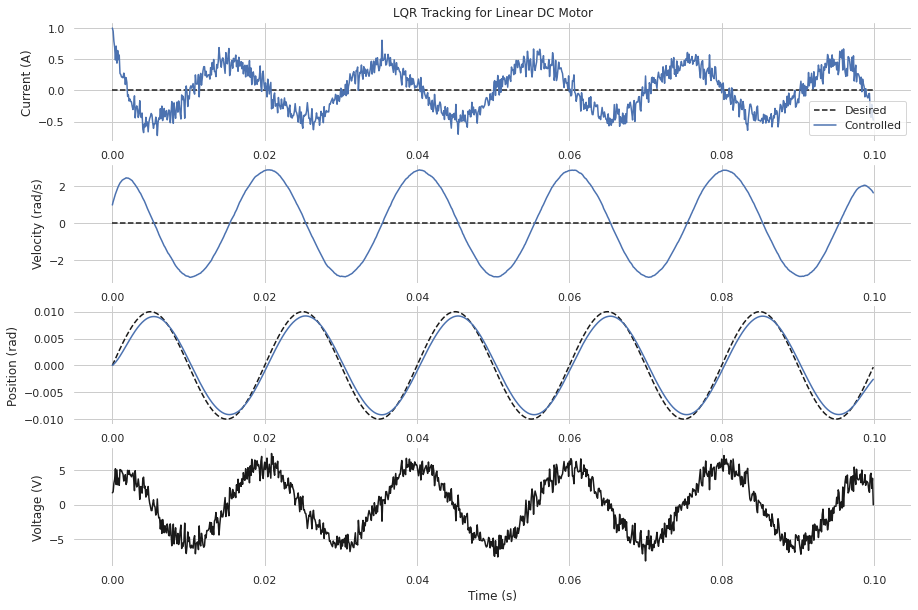

In [1]:
# This example uses the python bindings
from motor import main

# This is the same as running the python script
main(num_steps=1000,
     dt=1E-4,
     voltage_noise=1E2,
     current_noise=1E0,
     current_cost=1E3,
     velocity_cost=1E2,
     position_cost=1E8,
     horizon=31,
     show_plots=True)